# Dike Model Analysis

In [10]:
# import libraries
from ema_workbench import load_results
from ema_workbench.analysis import plotting, plotting_util, pairs_plotting
from ema_workbench.analysis import prim

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

## Visual Analysis

In [38]:
experiments, outcomes = load_results('./results/openexplor_problem3.tar.gz')

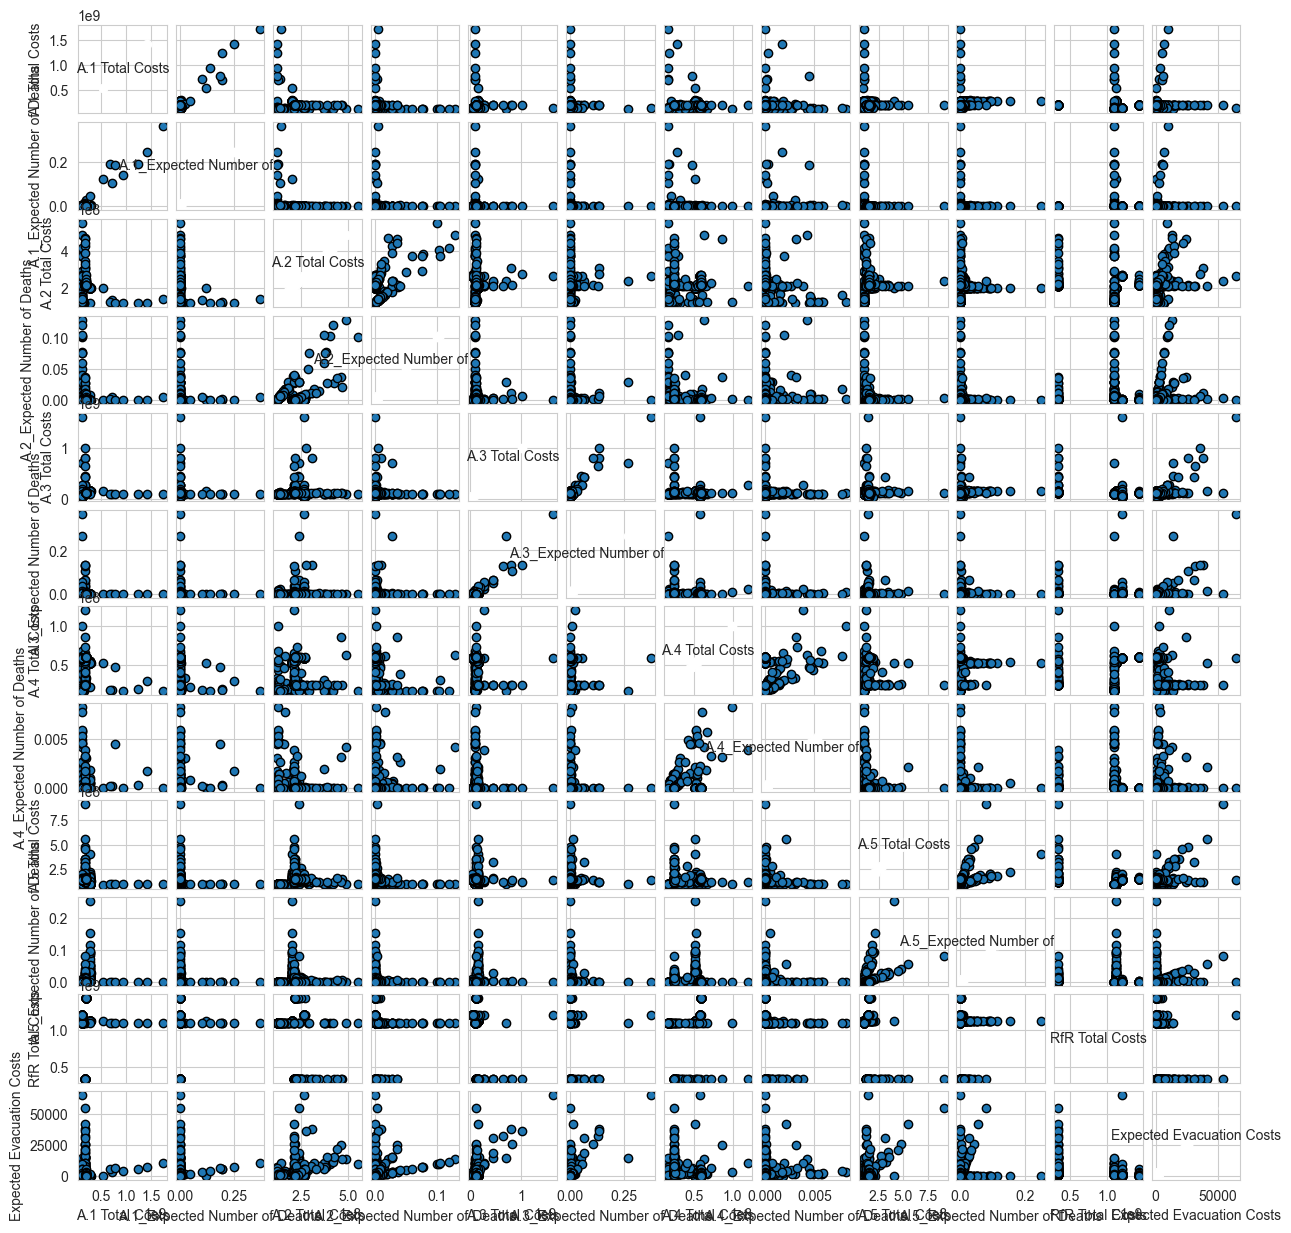

In [39]:
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

Interpretation of figure: There is a small trade-off between evacuation costs and expected annual damage

## Scenario discovery

In [40]:
experiments, outcomes = load_results('./results/prim_problem3b.tar.gz')

In [9]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,127,47.948326,1.5,0.982042,138.536140,1.5,0.507769,249.265956,10.0,0.194734,...,7,5,1,6,1,6,1,1,0,dikesnet
1,122,100.936763,1.0,0.279089,223.971872,1.5,0.890958,134.176975,10.0,0.649686,...,7,5,1,6,1,6,1,2,0,dikesnet
2,54,226.243017,10.0,0.077545,194.284213,1.5,0.969885,39.730114,1.5,0.330552,...,7,5,1,6,1,6,1,3,0,dikesnet
3,104,183.156812,1.5,0.352588,337.309721,10.0,0.906272,179.684961,1.5,0.313866,...,7,5,1,6,1,6,1,4,0,dikesnet
4,104,335.872782,1.0,0.082464,194.812803,10.0,0.540458,170.159088,1.0,0.376070,...,7,5,1,6,1,6,1,5,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,132,179.842739,10.0,0.335179,113.063396,1.5,0.919946,206.269613,1.5,0.563362,...,7,5,1,6,1,6,1,4996,0,dikesnet
4996,50,99.230418,1.0,0.282269,53.796431,1.5,0.632643,256.832770,10.0,0.033112,...,7,5,1,6,1,6,1,4997,0,dikesnet
4997,80,156.666102,1.0,0.014002,253.142322,10.0,0.505157,282.354479,10.0,0.823847,...,7,5,1,6,1,6,1,4998,0,dikesnet
4998,35,318.708025,1.0,0.272039,316.412594,1.0,0.754149,182.685077,1.0,0.650141,...,7,5,1,6,1,6,1,4999,0,dikesnet


In [10]:
# clean up experiments
X = experiments.iloc[:, 0:(len(experiments.columns)-3)]

In [41]:
outcomes

{'A.1 Total Costs': array([2.65958863e+08, 2.65958863e+08, 2.65958863e+08, ...,
        2.65958863e+08, 2.65958863e+08, 2.65958863e+08]),
 'A.1_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.2 Total Costs': array([2.15136625e+08, 2.11665637e+08, 2.11665637e+08, ...,
        2.13534345e+08, 2.12192469e+08, 2.14659855e+08]),
 'A.2_Expected Number of Deaths': array([0.00116164, 0.        , 0.        , ..., 0.00078265, 0.00022556,
        0.00152773]),
 'A.3 Total Costs': array([1.16451325e+08, 1.16451325e+08, 1.16451325e+08, ...,
        1.16451325e+08, 1.16451325e+08, 1.16451325e+08]),
 'A.3_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.4 Total Costs': array([37725187.44862177, 37725187.44862177, 37725187.44862177, ...,
        37725187.44862177, 37725187.44862177, 37725187.44862177]),
 'A.4_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.5 Total Costs': array([1.21855874e+08, 1.26529879e+08, 1.21855874e+08, ...,
      

In [11]:
outcomes.keys()

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])

In [67]:
outcome_to_study = 'A.2 Total Costs'
percentile = 15

In [94]:
# Calculate the threshold
threshold = np.percentile(outcomes[outcome_to_study], percentile) 
# Show threshold
print(f"The threshold for {percentile}% worst outcomes for {outcome_to_study} equals {threshold}.")

The threshold for 15% worst outcomes for A.2 Total Costs equals 211665637.03761387.


In [95]:
# Get column to optimise
opt = outcomes[outcome_to_study]
# To dataframe
opt = pd.DataFrame(opt)

In [96]:
opt

,0
0,2.151366e+08
1,2.116656e+08
2,2.116656e+08
3,2.116656e+08
4,2.151512e+08
...,...
4995,2.116656e+08
4996,2.126653e+08
4997,2.135343e+08
4998,2.121925e+08


In [97]:
opt[outcome_to_study] = np.where(opt[0] > threshold, 1, 0)

In [98]:

opt

,0,A.2 Total Costs
0,2.151366e+08,1
1,2.116656e+08,0
2,2.116656e+08,0
3,2.116656e+08,0
4,2.151512e+08,1
...,...,...
4995,2.116656e+08,0
4996,2.126653e+08,1
4997,2.135343e+08,1
4998,2.121925e+08,1


In [99]:
y = opt[outcome_to_study].to_numpy()

In [100]:
y

array([1, 0, 0, ..., 1, 1, 1])

In [101]:
# Define PRIM
sd_alg = prim.Prim(x=X, y=y, threshold=0.8, peel_alpha=0.1)

In [102]:
box = sd_alg.find_box()

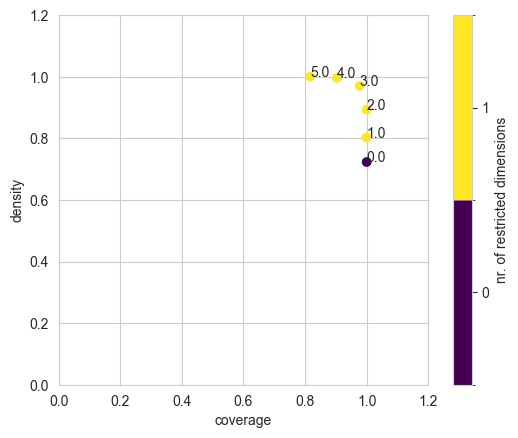

In [103]:
box.show_tradeoff(annotated=True)
plt.show()

In [104]:
point_to_study = 3

[<Figure size 640x480 with 1 Axes>]

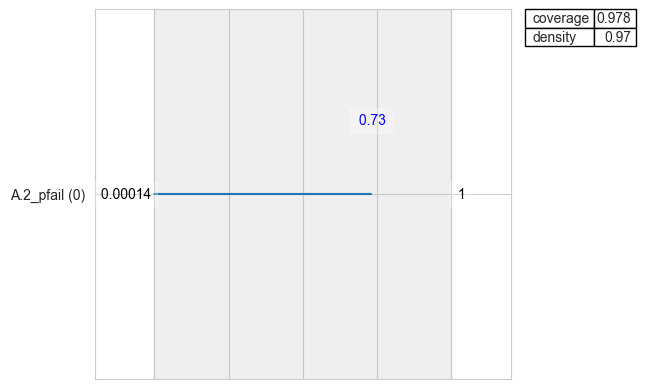

In [105]:
box.inspect(point_to_study, style='graph')

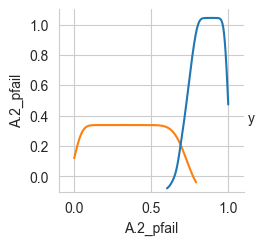

In [106]:
box.show_pairs_scatter(3)
plt.show()

Interpretation:  There are clusters of points (boxes) with varying coverage and density.\
For instance, the cluster on the left has lower coverage but higher density and a high number of restricted dimensions.\
Besides, The cluster on the right has higher coverage but slightly lower density and a lower number of restricted dimensions.\

**Notes**:\
Coverage = of all the datapoints, how many are in your final box?\
Density = of all the datapoints in your final box, how many are you interested in?\
Ideally: maximise coverage, maximise density, minimise dimensions
